# CSE 252A Computer Vision I Fall 2019 - Homework 4
## Instructor: Ben Ochoa
### Assignment published on: Tuesday, November 05, 2019
### Due on: Tuesday, November 19, 2019 11:59 pm

## Instructions
* Review the academic integrity and collaboration policies on the course website.
  * This assignment must be completed individually.
* All solutions must be written in this notebook.
  * This includes the theoretical problems, for which you **must** write your answers in Markdown cells (using LaTeX when appropriate).
  * Programming aspects of the assignment must be completed using Python in this notebook.
* If you want to modify the skeleton code, you may do so. It has only been provided as a framework for your solution.
* You may use Python packages (such as NumPy and SciPy) for basic linear algebra, but you may not use packages that directly solve the problem.
  * If you are unsure about using a specific package or function, then ask the instructor and/or teaching assistants for clarification.
* You must submit this notebook exported as a PDF. You must also submit this notebook as `.ipynb` file.
  * Submit both files (`.pdf` and `.ipynb`) on Gradescope.
  * **You must mark the PDF pages associated with each question in Gradescope. If you fail to do so, we may dock points.**
* It is highly recommended that you begin working on this assignment early.
* **Late policy: assignments submitted late will receive a 15% grade reduction for each 12 hours late (i.e., 30% per day). Assignments will not be accepted 72 hours after the due date. If you require an extension (for personal reasons only) to a due date, you must request one as far in advance as possible. Extensions requested close to or after the due date will only be granted for clear emergencies or clearly unforeseeable circumstances.**

## Problem 1: Epipolar Geometry [4 pts]
Consider two cameras whose image planes are the z=1 plane, and whose focal points are at (-12, 0, 0) and (12, 0, 0). We''ll call a point in the first camera (x, y), and a point in the second camera (u, v). Points in each camera are relative to the camera center. So, for example if (x, y) = (0, 0), this is really the point (-12, 0, 1) in world coordinates, while if (u, v) = (0, 0) this is the point (12, 0, 1).
![fig1](fig/fig1.png)

a) Suppose the points (x, y) = (8, 7) is matched to the point (u, v) = (2, 7). What is the 3D location of this point?

b) Compute the Essential Matrix.

c) Consider points that lie on the line x + z = 2, y = 0. Use the same stereo set up as before. Write an analytic expression giving the disparity of a point on this line after it projects onto the two images, as a function of its position in the right image. So your expression should only involve the variables u and d (for disparity). Your expression only needs to be valid for points on the line that are in front of the cameras, i.e. with z > 1.

### Problem 1a:

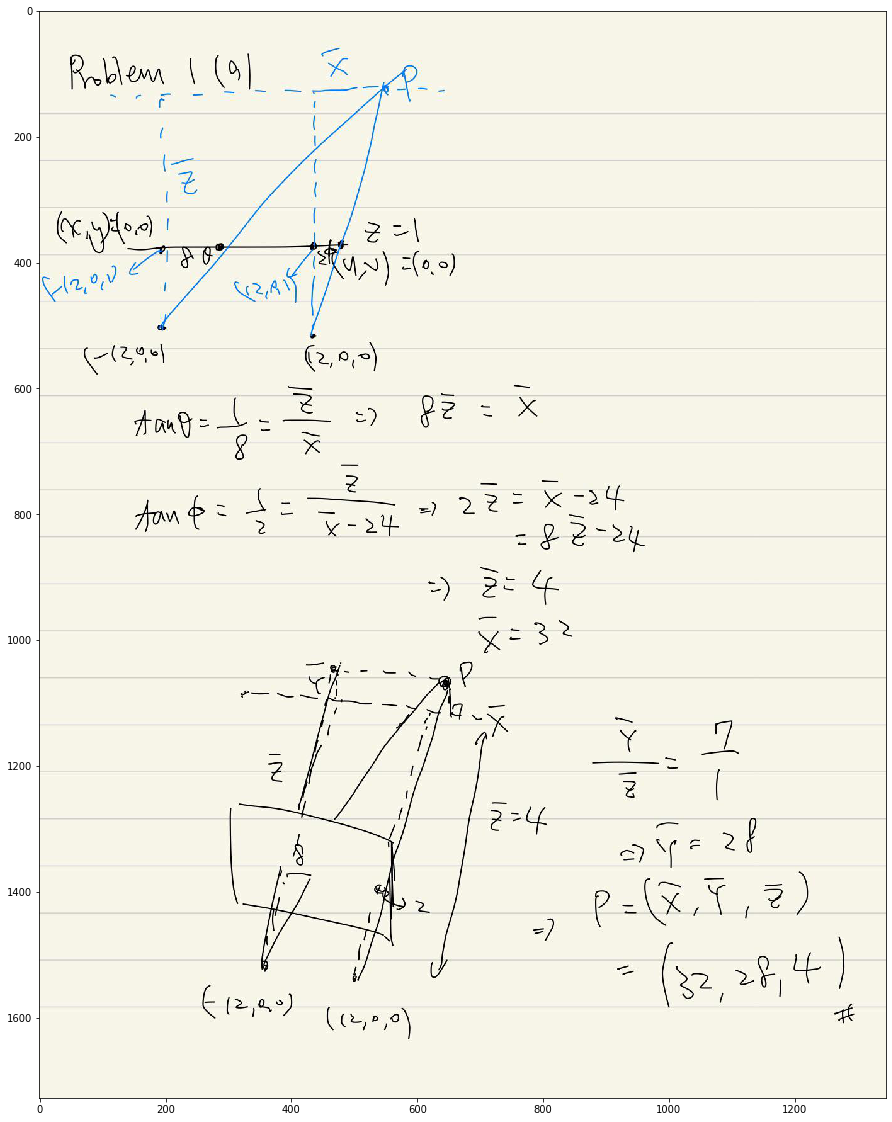

In [512]:
from skimage import io

img_1a = io.imread("p1a.jpg")
plt.figure(figsize=(20,20))
plt.imshow(img_1a)

### Problem 1b:

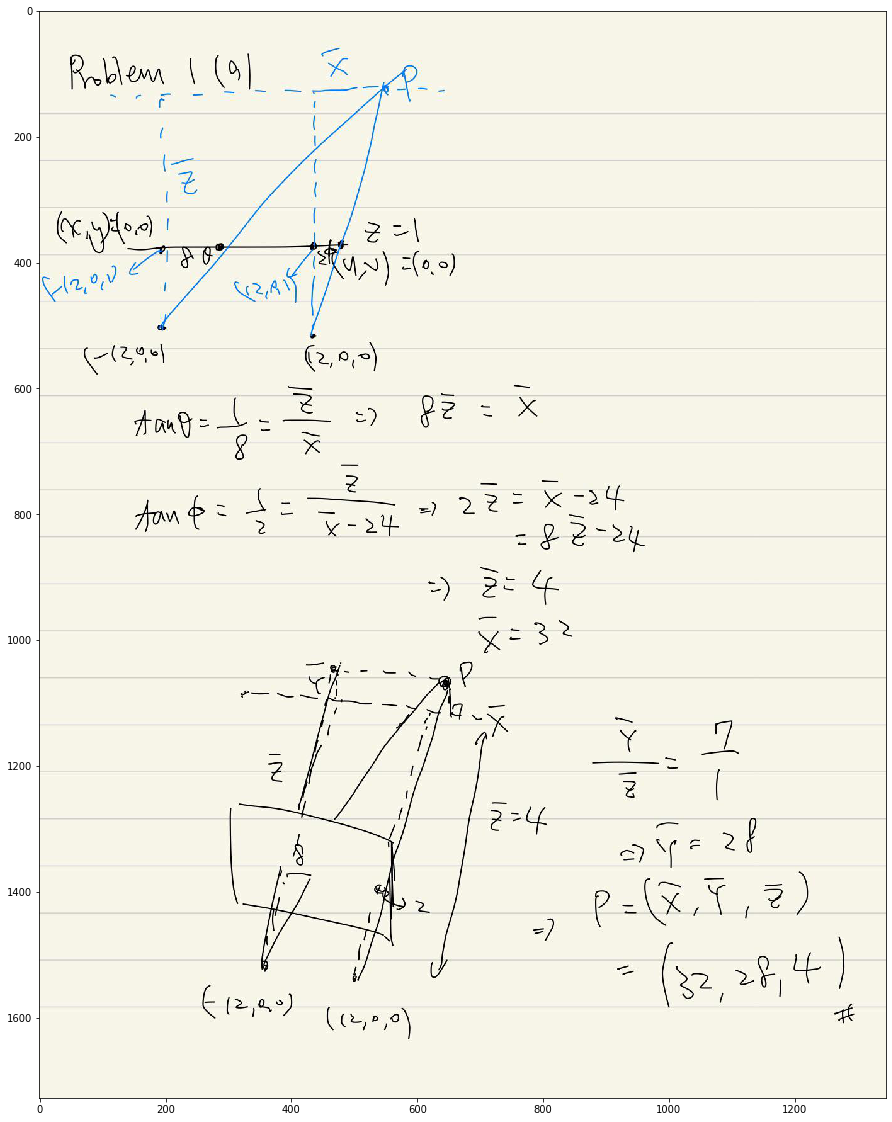

In [513]:
from skimage import io

img_1b = io.imread("p1b.jpg")
plt.figure(figsize=(20,20))
plt.imshow(img_1a)

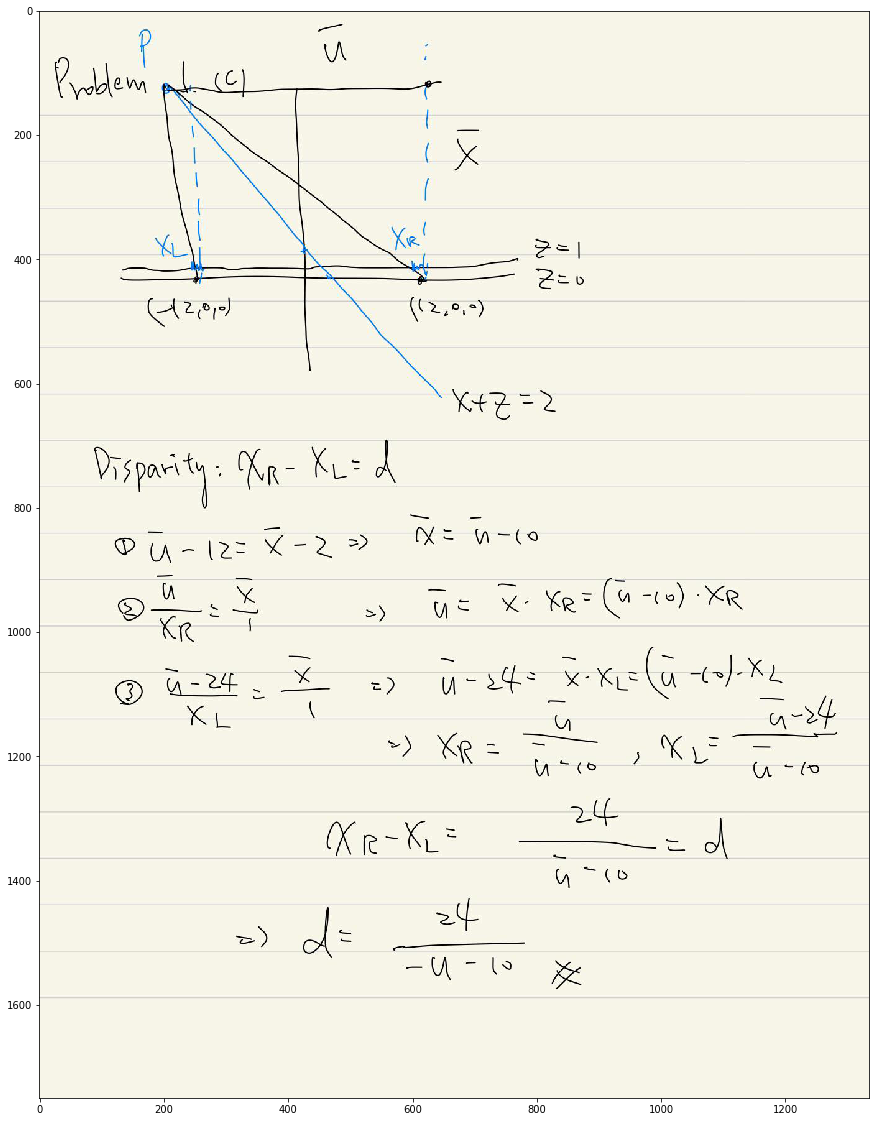

In [517]:
from skimage import io

img_1c = io.imread("p1c.jpg")
plt.figure(figsize=(20,20))
plt.imshow(img_1c)

## Problem 2: Epipolar Rectification [4 pts]
In stereo vision, image rectification is a common preprocessing step to simplify the problem of finding
matching points between images. The goal is to warp image views such that the epipolar lines are
horizontal scan lines of the input images. Suppose that we have captured two images $I_A$ and $I_B$ from
identical calibrated cameras separated by a rigid transformation

$_{A}^{B}\textrm{T}= \begin{bmatrix}
\boldsymbol{R} & \boldsymbol{t} \\ 
0^T & 1
\end{bmatrix}$ and $\boldsymbol{t}=[t_x,t_y,t_z]$

Without loss of generality assume that camera A's optical center is positioned at the origin and that its optical axis is in the direction of the z-axis.

From the lecture, a rectifying transform for each image should map the epipole to a point infinitely far away in the horizontal direction $ H_{A}e_{A} = H_{B}e_{B} = [1, 0, 0]^T$. Consider the following special cases:

a) Pure horizontal translation $\boldsymbol{t} = [t_{x}, 0, 0]^T$, $\boldsymbol{R} = \boldsymbol{I}$

b) Pure translation orthogonal to the optical axis $\boldsymbol{t} = [t_{x}, t_{y}, 0]^T$, $\boldsymbol{R} = \boldsymbol{I}$

c) Pure translation along the optical axis $\boldsymbol{t} = [0, 0, t_{z}]^T$, $\boldsymbol{R} = \boldsymbol{I}$

d) Pure rotation $\boldsymbol{t} = [0, 0, 0]^T$, $\boldsymbol{R}$ is an arbitrary rotation matrix

For each of these cases, determine whether or not epipolar rectification is possible. Include the following information for each case:

(i) The epipoles $e_A$ and $e_B$

(ii) The equation of the epipolar line $l_B$ in $I_B$ corresponding to the point $[x_A, y_A, 1]^T$ in $I_A$ (if one exists)

(iii) A plausible solution to the rectifying transforms $H_A$ and $H_B$ (if one exists) that attempts to minimize distortion (is as close as possible to a 2D rigid transformation). Note that the above 4 cases are special cases; a simple solution should become apparent by looking at the epipolar lines.

One or more of the above rigid transformations may be a degenerate case where rectification is not
possible or epipolar geometry does not apply. If so, explain why.

#### Problem2(a)(b) As long as the translation $\neq$ 0, the two epipols are well-defined, but may be points at infinity.

## Problem 3: Sparse Stereo Matching [32 pts]

In this problem we will play around with sparse stereo matching methods. You will work on two image pairs, a warrior figure and a figure from the Matrix movies. These files both contain two images, two camera matrices, and two sets of corresponding points (extracted by manually clicking the images). For illustration, I have run my code on a third image pair (dino1.png, dino2.png). This data is also provided for you to debug your code, but **you should only report results on warrior and matrix**. In other words, where I include one (or a pair) of images in the assignment below, you will provide the same thing but for BOTH matrix and warrior. Note that the matrix image pair is harder, in the sense that the matching algorithms we are implementing will not work quite as well. You should expect good results, however, on warrior.

### Corner Detection [8 pts]
The first thing we need to do is to build a corner detector. This should be done according to http://cseweb.ucsd.edu/classes/fa19/cse252A-a/lec7.pdf. You should fill in the function <code>corner_detect</code> below, and take as input <code>corner_detect(image, nCorners, smoothSTD, windowSize)</code> where smoothSTD is the standard deviation of the smoothing kernel and windowSize is the window size for corner detector and non maximum suppression. In the lecture the corner detector was implemented using a hard threshold. Do not do that but instead return the nCorners strongest corners after non-maximum suppression. This way you can control exactly how many corners are returned. Run your code on all four images (with nCorners = 20) and show outputs as shown below. You may find scipy.ndimage.filters.gaussian_filter easy to use for smoothing. In this problem, try the following different standard deviation ($\sigma$) parameters for the Gausian smoothing kernel: 0.5, 1, 2 and 4. For a particular $\sigma$, you should take the kernel size to be $6\times\sigma$ (add $1$ if the kernel size is even). So for example if $\sigma=2$, corner detection kernel size should be $13$. This should be followed throughtout all experiments in this assignment.

There will be a total of 16 images as outputs : (4 choices of smoothSTD x 2 matrix imgs x 2 warrior imgs). 


![dinoCorner1](fig/dinoCorner1.png)
![dinoCorner2](fig/dinoCorner2.png)

Comment on your results and observations (3/8 points). You don't need to comment per output, just **discuss** any trends you see for the detected corners as you change the windowSize and increase the smoothing w.r.t the two pair of images warrior and matrix. Also discuss if you are able to find corresponding corners for same pair of images. 

In [13]:
import numpy as np
#from scipy.misc import imread
from matplotlib.pyplot import imread
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter
import imageio
from numpy import linalg as LA

In [9]:
def rgb2gray(rgb):
    """ Convert rgb image to grayscale.
    """
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

In [71]:
from numpy import linalg as LA
from PIL import Image
import PIL
img = Image.open("p4/warrior/warrior0.png")
basewidth = 200
wpercent = (basewidth / float(img.size[0]))
hsize = int((float(img.size[1]) * float(wpercent)))
img = img.resize((basewidth, hsize), PIL.Image.ANTIALIAS)                  
img = np.array(img)
img = rgb2gray(img)
#plt.imshow(img)
sigma = 3
img_gray = gaussian_filter(img, sigma = sigma)
gx,gy = np.gradient(img_gray)
window_size = sigma*2+1 if sigma*2%2 == 0 else sigma*2


W,H = img_gray.shape[0], img_gray.shape[1]
w = int(window_size /2)
E = np.zeros((H,W))
Ix = gx**2
Iy = gy**2
Ixy = gx*gy
for i in range(w,H-w):
    for j in range(w,W-w):
        C = np.zeros((2,2))
        C[0,0] = np.sum(Ix[i-w:i+w+1,j-w:j+w+1])
        C[1,1] = np.sum(Iy[i-w:i+w+1,j-w:j+w+1])
        tmp = np.sum(Ixy[i-w:i+w+1,j-w:j+w+1])
        C[0,1] = C[1,0] = tmp
        
        eigvals = np.linalg.eigvals(C)
        E[i,j] = min(eigvals) 
print("E values calculated")

def NMS(E, window_size ):
    #Non-maximum suppresion to find actual corners
    E_copy = np.copy(E)
    corners = []
    w = int(window_size/2)
    H,W = E.shape
    
    for i in range(w, H-w):
        for j in range(w, W-w):
            window = E[i-w:i+w+1,j-w:j+w+1]
            if E[i,j]!=np.max(window):
                E_copy[i,j] = 0 
            else:
                corners.append((i,j,E[i,j]))
    return corners

def topCorners(corners, n = 10):
    '''
    return most corners with highest value
    input: list of possible corner coordinates of  (i,j,E_value)
    output: 20 coreners' coordinate in a numpy array (n*2)
    '''
    sortCorners = sorted(corners, key = lambda x: x[2], 
                         reverse = True)[:20]
    final_corners = [[p[0],p[1]] for p in sortCorners]
    return np.array(final_corners)

corners = NMS(E, window_size)
final_corners = topCorners(corners)
print("there are {} corners found".format(len(corners)))
print(final_corners.shape)

E values calculated
there are 189 corners found
(20, 2)


In [156]:
def NMS(E, window_size):
        #Non-maximum suppresion to find actual corners
        corners = []
        w = int(window_size/2)
        H,W = E.shape
        for i in range(w, H-w):
            for j in range(w, W-w):
                window = E[i-w:i+w+1,j-w:j+w+1]
                if E[i,j]!=np.max(window):
                    E[i,j] = 0 
                else:
                    corners.append((i,j,E[i,j]))
        return corners

def topCorners(corners, n = 20):
    '''
    return most corners with highest value
    input: list of possible corner coordinates of  (i,j,E_value)
    output: 20 coreners' coordinate in a numpy array (n*2)
    '''
    sortCorners = sorted(corners, key = lambda x: x[2], 
                         reverse = True)[:n]
    ### reverse x,y coordinates for plt.plot()
    final_corners = [[p[1],p[0]] for p in sortCorners]
    return np.array(final_corners)

def corner_detect(image, nCorners, smoothSTD, windowSize):
    """Detect corners on a given image.

    Args:
        image: Given a grayscale image on which to detect corners.
        nCorners: Total number of corners to be extracted.
        smoothSTD: Standard deviation of the Gaussian smoothing kernel.
        windowSize: Window size for corner detector and non maximum suppression.

    Returns:
        Detected corners (in image coordinate) in a numpy array (n*2).

    """
    
    """
    Put your awesome numpy powered code here:
    """

    img_gray = gaussian_filter(image, sigma = smoothSTD)
    gx,gy = np.gradient(img_gray)
    #window_size = sigma*2+1 if sigma*2%2 == 0 else sigma*2
    window_size = windowSize
    W,H = img_gray.shape[0], img_gray.shape[1]
    w = int(window_size /2)
    E = np.zeros((H,W))
    Ix = gx**2
    Iy = gy**2
    Ixy = gx*gy
    for i in range(w,H-w):
        for j in range(w,W-w):
            C = np.zeros((2,2))
            C[0,0] = np.sum(Ix[i-w:i+w+1,j-w:j+w+1])
            C[1,1] = np.sum(Iy[i-w:i+w+1,j-w:j+w+1])
            tmp = np.sum(Ixy[i-w:i+w+1,j-w:j+w+1])
            C[0,1] = C[1,0] = tmp

            eigvals = np.linalg.eigvals(C)
            E[i,j] = min(eigvals) 
    #print("E values calculated")
    corners = NMS(E, window_size)
    final_corners = topCorners(corners, n = nCorners)
    #corners = np.zeros((nCorners, 2))
    return final_corners

In [93]:
def show_corners_result(imgs, corners):
    fig = plt.figure(figsize=(15, 15))
    ax1 = fig.add_subplot(221)
    ax1.imshow(imgs[0], cmap='gray')
    ax1.scatter(corners[0][:, 0], corners[0][:, 1], s=36, 
                edgecolors='r', facecolors='none')

    ax2 = fig.add_subplot(222)
    ax2.imshow(imgs[1], cmap='gray')
    ax2.scatter(corners[1][:, 0], corners[1][:, 1], s=36, 
                edgecolors='r', facecolors='none')
    plt.show()

SmoothSTD: 0.5 WindowSize: 3


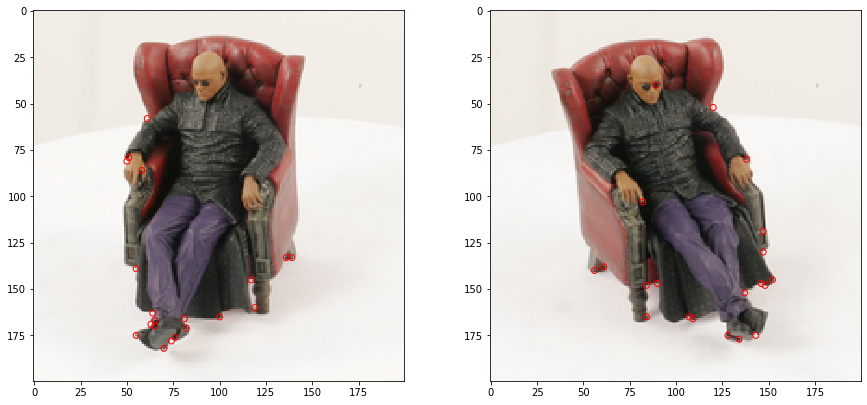

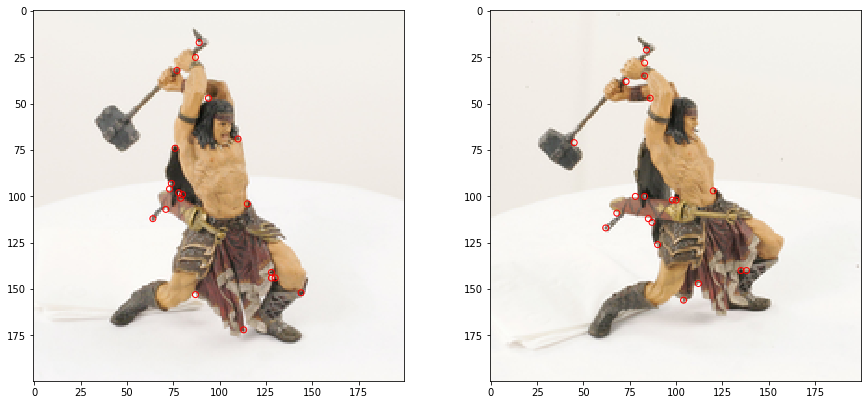

SmoothSTD: 1 WindowSize: 7


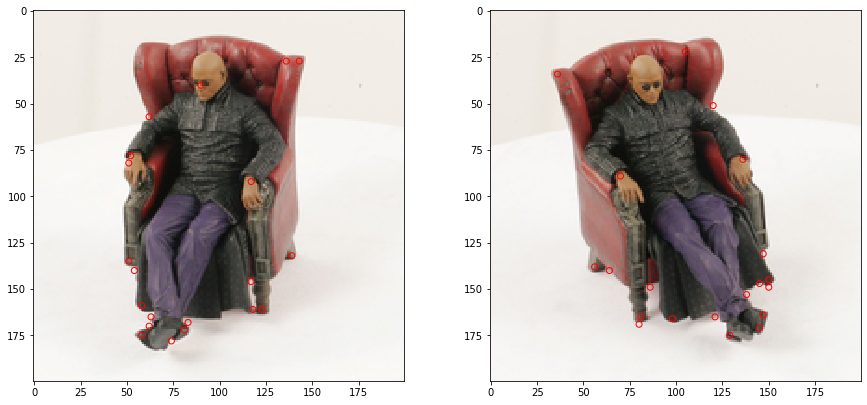

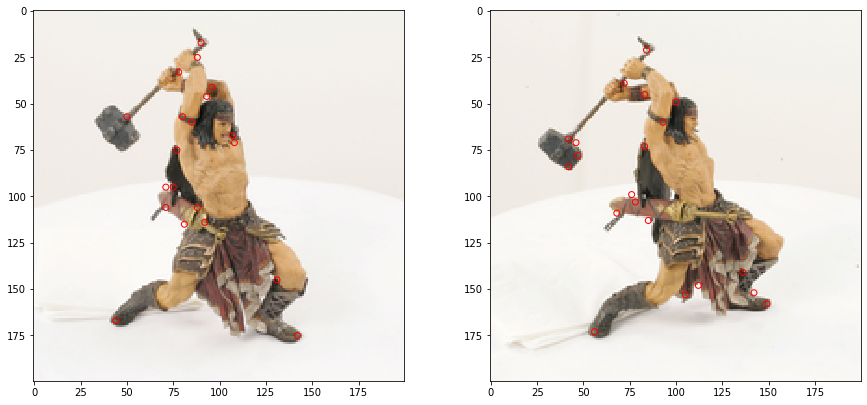

SmoothSTD: 2 WindowSize: 13


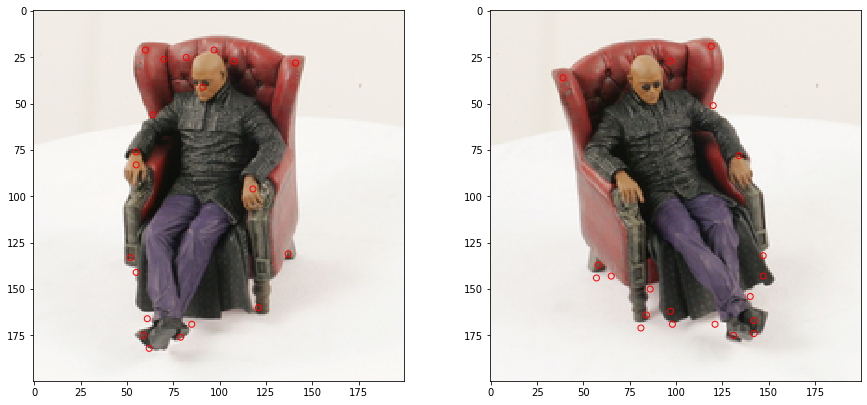

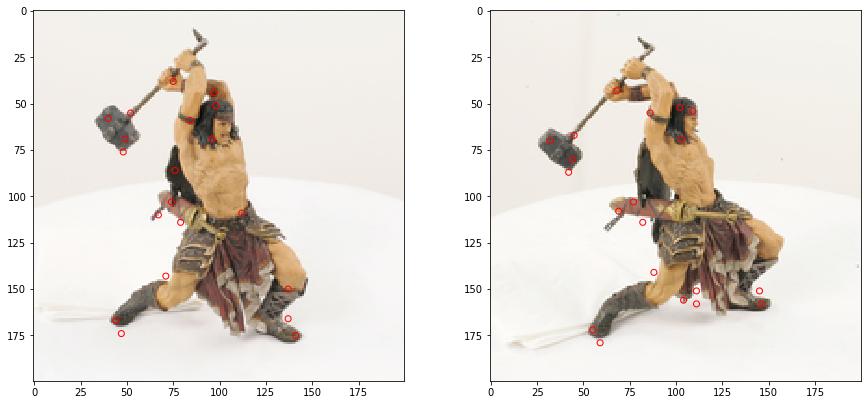

SmoothSTD: 4 WindowSize: 25


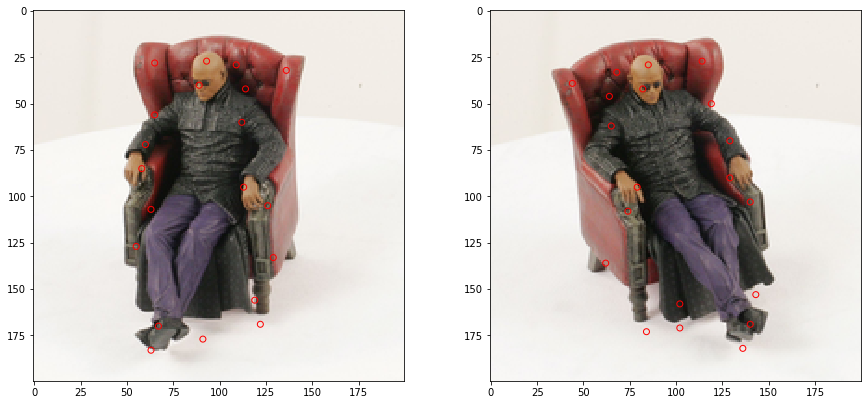

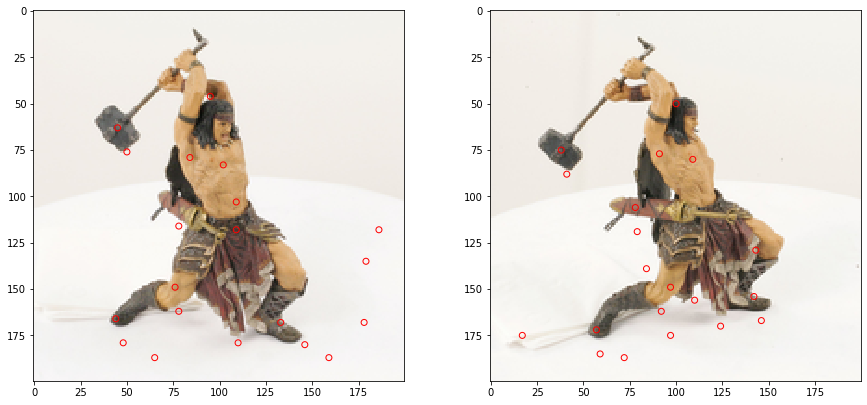

In [186]:
# detect corners on warrior and matrix image sets
# adjust your corner detection parameters here
nCorners = 20
smoothSTDs = [0.5, 1, 2, 4]
imgs_mat = []
imgs_war = []
grayimgs_mat = []
grayimgs_war = []
# Read the two images and convert it to Greyscale
for i in range(2):
    
    img_mat = Image.open('p4/matrix/matrix' + str(i) + '.png')
    
    basewidth = 200
    wpercent = (basewidth / float(img_mat.size[0]))
    hsize = int((float(img_mat.size[1]) * float(wpercent)))
    img_mat = img_mat.resize((basewidth, hsize), PIL.Image.ANTIALIAS)   
    img_mat = np.array(img_mat)
    imgs_mat.append(np.array(img_mat))
    grayimgs_mat.append(rgb2gray(img_mat))
    
    
    #img_mat = imageio.imread('p4/matrix/matrix' + str(i) + '.png')

    # Comment above line and uncomment below line to
    # downsize your image in case corner_detect runs slow in test 
    #grayimgs_mat.append(rgb2gray(img_mat)[::2, ::2])
    # if you unleash the power of numpy you wouldn't need to downsize, it'll be fast
    #img_war = imageio.imread('p4/warrior/warrior' + str(i) + '.png')
    img_war = Image.open('p4/warrior/warrior' + str(i) + '.png')
    wpercent = (basewidth / float(img_war.size[0]))
    hsize = int((float(img_war.size[1]) * float(wpercent)))
    img_war = img_war.resize((basewidth, hsize), PIL.Image.ANTIALIAS)
    img_war = np.array(img_war)
    imgs_war.append(img_war)
    grayimgs_war.append(rgb2gray(img_war))
    
    #imgs_war.append(img_war)
    #grayimgs_war.append(rgb2gray(img_war))
    
for smoothSTD in smoothSTDs:
    windowSize = int(6*smoothSTD)
    if windowSize%2==0: windowSize += 1
    crns_mat = []
    crns_war = []
    print ("SmoothSTD:", smoothSTD, "WindowSize:", windowSize)
    for i in range(2):
        crns_mat.append(corner_detect(grayimgs_mat[i], nCorners, 
                                      smoothSTD,windowSize))
        crns_war.append(corner_detect(grayimgs_war[i], nCorners, 
                                      smoothSTD,windowSize))
    show_corners_result(imgs_mat, crns_mat) #uncomment this to show your output!
    show_corners_result(imgs_war, crns_war)

#### Comment on results and observations:
##### From the images above we can see that, the larger the window size, less accurate the corners would be. It is possibly beacuse that the window size is too big to represent the corner's feature due to too much non-corner noise. On the other hand, it seems like the smaller the window size, the higher accuracy we can obtain. However, we can see that when using window_size = 3 (too small), coreners would be detected too closely, which might possibly be same coreners. 


### NCC (Normalized Cross-Correlation) Matching [2 pts]

Write a function <code>ncc_match</code> that implements the NCC matching algorithm for two input windows.
NCC = $\sum_{i,j}\tilde{W_1} (i,j)\cdot \tilde{W_2} (i,j)$ where $\tilde{W} = \frac{W - \overline{W}}{\sqrt{\sum_{k,l}(W(k,l) - \overline{W})^2}}$ is a mean-shifted and normalized version of the window and $\overline{W}$ is the mean pixel value in the window W.

In [438]:
def ncc_match(img1, img2, c1, c2, R):
    """Compute NCC given two windows.

    Args:
        img1: Image 1.
        img2: Image 2.
        c1: Center (in image coordinate) of the window in image 1.
        c2: Center (in image coordinate) of the window in image 2.
        R: R is the radius of the patch, 2 * R + 1 is the window size

    Returns:
        NCC matching score for two input windows.

    """
    
    """
    Your code here:
    """
    window1 = img1[c1[1]-R:c1[1]+R+1,c1[0]-R:c1[0]+R+1]
    window2 = img2[c2[1]-R:c2[1]+R+1,c2[0]-R:c2[0]+R+1]
    def getW(window,c,R):
        window_size = (2*R+1,2*R+1)
        w_mean = np.mean(window)
        W = window - w_mean
        norm = np.sqrt(np.sum((window-w_mean)**2))
        W = W/norm
        #print(type(W))
        #print("shape of W: {}".format(W.shape))
        return W
    #print("window1.shape:{}".format(window1.shape))
    #print("window2.shape:{}".format(window2.shape))
    W1 = getW(window1, c1, R)
    W2 = getW(window2, c2, R)
    #print("shape of W1: {}".format(W1.shape))
    #print("shape of W2: {}".format(W2.shape))
    #print("W1: {}".format(W1))
    #print("W2: {}".format(W2))
    NCC = np.sum(W1*W2)
    matching_score = NCC
    return matching_score

In [171]:
# test NCC match
img1 = np.array([[1, 2, 3, 4], [4, 5, 6, 8], [7, 8, 9, 4]])
img2 = np.array([[1, 2, 1, 3], [6, 5, 4, 4], [9, 8, 7, 3]])
print (ncc_match(img1, img2, np.array([1, 1]), np.array([1, 1]), 1))
# should print 0.8546
print (ncc_match(img1, img2, np.array([2, 1]), np.array([2, 1]), 1))
# should print 0.8457
print (ncc_match(img1, img2, np.array([1, 1]), np.array([2, 1]), 1))
# should print 0.6258

0.8546547739343037
0.8457615282174419
0.6258689611426174


### Naive Matching [4 pts]

Equipped with the corner detector and the NCC matching function, we are ready to start finding correspondances. One naive strategy is to try and find the best match between the two sets of corner points. Write a script that does this, namely, for each corner in image1, find the best match from the detected corners in image2 (or, if the NCC match score is too low, then return no match for that point). You will have to figure out a good threshold (NCCth) value by experimentation. Write a function <code>naive_matching</code> and call it as below. Examine your results for 10, 20, and 30 detected corners in each image. Choose number of detected corners to maximize the number of correct matching pairs. <code>naive_matching</code> will call your NCC matching code. 
**Properly label or mention which output corresponds to which choice of number of corners. Total number of output is 6 images** (3 choice of number of corners for each matrix and warrior), where one image is like below:


Number of Corners: 10
<img src = "fig/dinoMatch.png" alt="dino match" width="800"/>

In [207]:
def naive_matching(img1, img2, corners1, corners2, R, NCCth):
    """Compute NCC given two windows.

    Args:
        img1: Image 1.
        img2: Image 2.
        corners1: Corners in image 1 (nx2)
        corners2: Corners in image 2 (nx2)
        R: NCC matching radius
        NCCth: NCC matching score threshold

    Returns:
        NCC matching result a list of tuple (c1, c2), 
        c1 is the 1x2 corner location in image 1, 
        c2 is the 1x2 corner location in image 2. 

    """
    
    """
    Your code here:
    """
    matching = []
    for c1 in corners1:
        ncc_max = float('-inf')
        for c2 in corners2:
            ncc_now = ncc_match(img1, img2, c1, c2, R)
            if ncc_now > ncc_max:
                ncc_max = ncc_now
                pairs = (c1,c2)
        if ncc_max > NCCth:
            matching.append(pairs)
    return matching

In [213]:
# You are free to modify code here, create your helper functions etc.
# detect corners on warrior and matrix sets
nCorners = 10 # Do this for 10, 20 and 30 corners
smoothSTD = 2
windowSize = 13

# read images and detect corners on images
imgs_mat = []
crns_mat = []
imgs_war = []
crns_war = []
imgs_war_color = []
#store gray images and detected corners into arrays
for i in range(2):
    img_mat = Image.open('p4/matrix/matrix' + str(i) + '.png')
    basewidth = 200
    wpercent = (basewidth / float(img_mat.size[0]))
    hsize = int((float(img_mat.size[1]) * float(wpercent)))
    img_mat = img_mat.resize((basewidth, hsize), 
                             PIL.Image.ANTIALIAS)   
    img_mat = np.array(img_mat)
    imgs_mat.append(rgb2gray(img_mat))
    img_war = Image.open('p4/warrior/warrior' + str(i) + '.png')
    
    wpercent = (basewidth / float(img_war.size[0]))
    hsize = int((float(img_war.size[1]) * float(wpercent)))
    img_war = img_war.resize((basewidth, hsize), 
                             PIL.Image.ANTIALIAS)   
    img_war = np.array(img_war)
    imgs_war_color.append(img_war)
    imgs_war.append(rgb2gray(img_war))


Matrix:
NCCths = 0.3,# of Corners:10


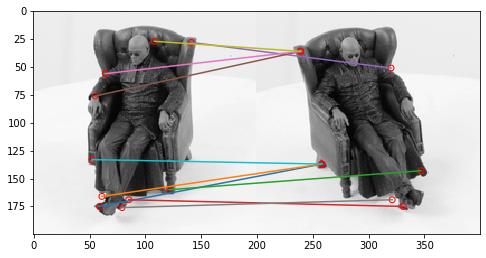

Warrior:
NCCths = 0.4,# of Corners:10


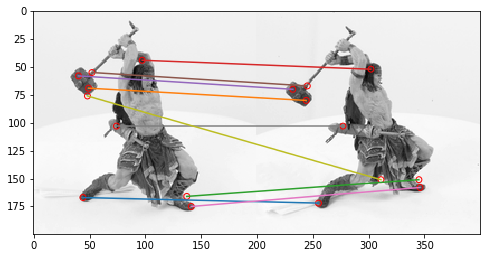

_________________________________
Matrix:
NCCths = 0.3,# of Corners:20


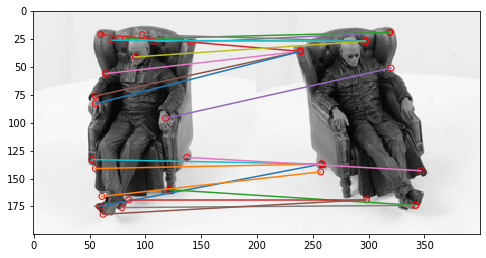

Warrior:
NCCths = 0.5,# of Corners:20


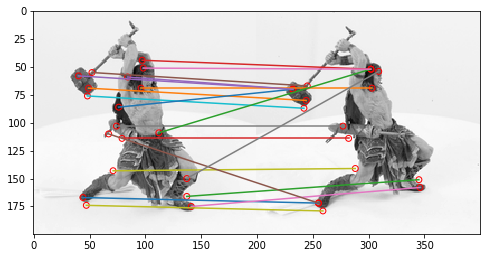

_________________________________
Matrix:
NCCths = 0.6,# of Corners:30


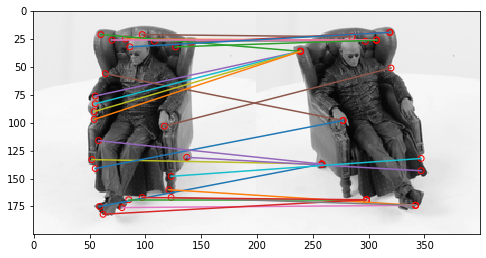

Warrior:
NCCths = 0.5,# of Corners:30


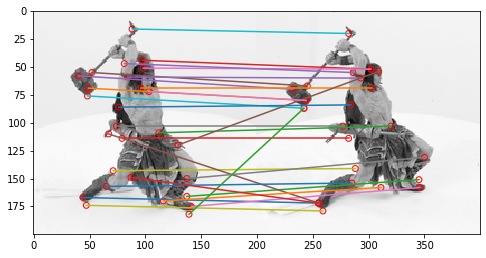

_________________________________


In [492]:
# plot matching result
def show_matching_result(img1, img2, matching):
    fig = plt.figure(figsize=(8, 8))
    plt.imshow(np.hstack((img1, img2)), cmap='gray') 
    # two dino images are of different sizes, resize one before use
    for p1, p2 in matching:
        plt.scatter(p1[0], p1[1], s=35, edgecolors='r', facecolors='none')
        plt.scatter(p2[0] + img1.shape[1], p2[1], s=35, 
                    edgecolors='r', facecolors='none')
        plt.plot([p1[0], p2[0] + img1.shape[1]], [p1[1], p2[1]])
    plt.savefig('dino_matching.png')
    plt.show()

smoothSTD = 2
windowSize = 13   
R = 15
N = [10,20,30]
NCCths  = [[0.3,0.4],[0.3,0.5],[0.6,0.5]]
for i,nCorners in enumerate(N):
    NCCth_mat, NCCth_war = NCCths[i]
    crns_war = []
    crns_mat = [] 
    for i in range(2):
        crns_mat.append(corner_detect(imgs_mat[i], nCorners, 
                                      smoothSTD, windowSize))
        crns_war.append(corner_detect(imgs_war[i], nCorners, 
                                      smoothSTD, windowSize))

    # match corners
    # Put your threshold
    matching_mat = naive_matching(imgs_mat[0]/255, imgs_mat[1]/255, 
                                  crns_mat[0], crns_mat[1], R, NCCth_mat)
    matching_war = naive_matching(imgs_war[0]/255, imgs_war[1]/255, 
                                  crns_war[0], crns_war[1], R, NCCth_war)

    # Uncomment to show output
    print("Matrix:")
    print("NCCths = {},# of Corners:{}".format(NCCth_mat, nCorners))
    show_matching_result(imgs_mat[0], imgs_mat[1], matching_mat)
    print("Warrior:")
    print("NCCths = {},# of Corners:{}".format(NCCth_war, nCorners))
    show_matching_result(imgs_war[0], imgs_war[1], matching_war)
    print("_________________________________")                                                         


### Epipolar Geometry [4 pts]

Complete the <code>compute_fundamental</code> function below using 8 point algorithm described in [Lecture 8](http://cseweb.ucsd.edu/classes/fa19/cse252A-a/lec8.pdf). Using the <code>fundamental_matrix</code> function and the corresponding points provided in cor1.npy and cor2.npy, calculate the fundamental matrix for the set of matrix and warrior image. Note that the normalization of the corner point is handled in the <code>fundamental_matrix</code> function.

In [286]:
import numpy as np
#from scipy.misc import imread
import matplotlib.pyplot as plt
from scipy.io import loadmat

def compute_fundamental(x1,x2):
    """    Computes the fundamental matrix from corresponding points 
        (x1,x2 3*n arrays) using the 8 point algorithm.
        Each row in the A matrix below is constructed as
        [x'*x, x'*y, x', y'*x, y'*y, y', x, y, 1] 

        Returns:
        Fundamental Matrix (3x3)

    """
    
    """
    Your code here
    """
    n = x1.shape[1]
    if x2.shape[1] != n:
        raise ValueError("Number of points don't match.")
        
    # build matrix for equations
    A = np.zeros((n,9))
    
    for i in range(n):
        #constrauct [x'*x, x'*y, x', y'*x, y'*y, y', x, y, 1] for 
        # corresponding pairs
        A[i,:] = np.dot(x1[:,i,None],x2[:,i,None].T).reshape(1,9)
    
    # compute linear least square solution
    u,s,v = np.linalg.svd(A)
    # solve as eigenvectors corresponding to smallest eigenvalue
    F = v[-1].reshape(3,3) 
    # constrain F
    # make rank 2 by zeroing out last singular value
    u,s,v = np.linalg.svd(F)
    s[2] = 0 
    F = np.dot(u,np.dot(np.diag(s),v))
    
    return F/F[2,2]
                          

def fundamental_matrix(x1,x2):
    # Normalization of the corner points is handled here
    n = x1.shape[1]
    if x2.shape[1] != n:
        raise ValueError("Number of points don't match.")

    # normalize image coordinates
    x1 = x1 / x1[2]
    mean_1 = np.mean(x1[:2],axis=1)
    S1 = np.sqrt(2) / np.std(x1[:2])
    T1 = np.array([[S1,0,-S1*mean_1[0]],[0,S1,-S1*mean_1[1]],[0,0,1]])
    x1 = np.dot(T1,x1)
    
    x2 = x2 / x2[2]
    mean_2 = np.mean(x2[:2],axis=1)
    S2 = np.sqrt(2) / np.std(x2[:2])
    T2 = np.array([[S2,0,-S2*mean_2[0]],[0,S2,-S2*mean_2[1]],[0,0,1]])
    x2 = np.dot(T2,x2)

    # compute F with the normalized coordinates
    F = compute_fundamental(x1,x2)

    # reverse normalization
    F = np.dot(T1.T,np.dot(F,T2))

    return F/F[2,2]

### Plot Epipolar Lines [5 pts]
Using this fundamental matrix, plot the epipolar lines in both image pairs across all images. For this part you may want to complete the function <code>plot_epipolar_lines</code>. Shown your result for matrix and warrior as the figure below. 
![Dino Epipolar](fig/dinoEpi1.png)
![Dino Epipolar](fig/dinoEpi2.png)

Also, write the script to calculate the epipoles for a given Fundamental matrix and corner point correspondences in the two images.

In [379]:
def compute_epipole(F):
    '''
    This function computes the epipoles for a given fundamental matrix 
    and corner point correspondences
    input:
    F--> Fundamental matrix
    output:
    e1--> corresponding epipole in image 1
    e2--> epipole in image2
    '''
    #your code here
    e1 = null_space(F.T)
    e2 = null_space(F)
    e1 = e1/e1[2]
    e2 = e2/e2[2]
    return e1,e2

def plot_epipolar_lines(img1,img2, cor1, cor2, colormode = "color"):
    """Plot epipolar lines on image given image, corners

    Args:
        img1: Image 1.
        img2: Image 2.
        cor1: Corners in homogeneous image coordinate in image 1 (3xn)
        cor2: Corners in homogeneous image coordinate in image 2 (3xn)

    """
    """
    Your code here:
    """
    n = cor1.shape[1]
    #Get epipolar lines
    F = fundamental_matrix(cor1, cor2)
    L1 = np.dot(F, cor2)
    L2 = np.dot(F.T, cor1)
    
    def plt_epipolar(L,img,cor):
        n = cor.shape[1]
        h,w = img.shape[:2]
        fig = plt.figure(figsize = (5,5))
        plt.imshow(img, cmap = colormode)
        x = range(w)
        for i in range(n):
            line_x = []
            line_y = [] 
            plt.scatter(cor[0,i],cor[1,i],s = 30, edgecolors = 'r')
            for idx, xx in enumerate(x):
                yy = (-L[0,i]*xx - L[2,i])/ L[1,i]
                if yy < 0 or yy > h:
                    continue
                line_y.append(yy)
                line_x.append(xx)
            plt.plot(line_x, line_y)
            
    plt_epipolar(L1,img1,cor1)
    plt_epipolar(L2,img2,cor2)



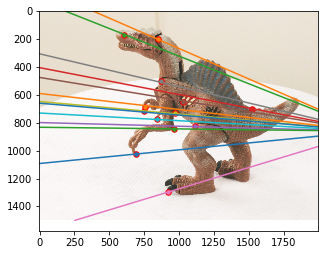

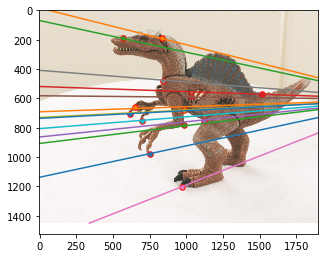

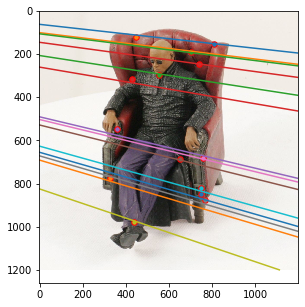

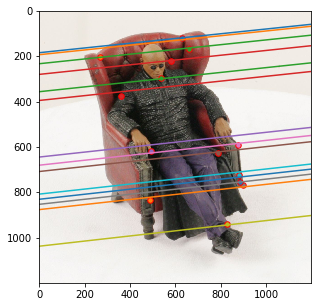

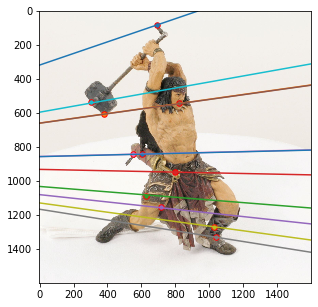

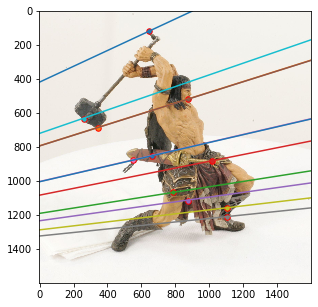

In [377]:
# replace images and corners with those of matrix and warrior
imgids = ["dino", "matrix", "warrior"]
for imgid in imgids:
    I1 = imageio.imread("./p4/"+imgid+"/"+imgid+"0.png")
    I2 = imageio.imread("./p4/"+imgid+"/"+imgid+"1.png")

    cor1 = np.load("./p4/"+imgid+"/cor1.npy")
    cor2 = np.load("./p4/"+imgid+"/cor2.npy")

    plot_epipolar_lines(I1,I2,cor1,cor2)

### Image Rectification [5 pts]
 An interesting case for epipolar geometry occurs when two images are parallel to each other. In this case, there is no rotation component involved between the two images and the essential matrix is $\texttt{E}=[\boldsymbol{T_{x}}]\boldsymbol{R}=[\boldsymbol{T_{x}}]$. Also if you observe the epipolar lines $\boldsymbol{l}$ and $\boldsymbol{l^{'}}$ for parallel images, they are horizontal and consequently, the corresponding epipolar lines share the same vertical coordinate. Therefore the process of making images parallel becomes useful while discerning the relationships between corresponding points in images.
 Rectifying a pair of images can also be done for uncalibrated camera images (i.e. we do not require the camera matrix of intrinsic parameters). Using the fundamental matrix we can find the pair of epipolar lines $\boldsymbol{l_i}$ and $\boldsymbol{l^{'}_i}$ for each of the correspondences. The intersection of these lines will give us the respective epipoles $\boldsymbol{e}$ and $\boldsymbol{e^{'}}$.  Now to make the epipolar lines to be parallel we need to map the epipoles to infinity. Hence , we need to find a homography that maps the epipoles to infinity. The method to find the homography has been implemented for you. You can read more about the method used to estimate the homography in the paper "Theory and Practice of Projective Rectification" by Richard Hartley.
 ![Image Rectification Setup](image_rectification.png)
 Using the compute_epipoles function from the previous part and the given compute_matching_homographies function, find the rectified images and plot the parallel epipolar lines using the plot_epipolar_lines function from above. You need to do this for both the matrix and the warrior images. A sample output will look as below:
 ![sample rectification](Sample_rectification.png)

In [502]:
def compute_matching_homographies(e2, F, im2, points1, points2):
    
    '''This function computes the homographies to get the rectified images
    input:
    e2--> epipole in image 2
    F--> the Fundamental matrix (Think about what you should be passing F or F.T!)
    im2--> image2
    points1 --> corner points in image1
    points2--> corresponding corner points in image2
    output:
    H1--> Homography for image 1
    H2--> Homography for image 2
    '''
    # calculate H2
    width = im2.shape[1]
    height = im2.shape[0]

    T = np.identity(3)
    T[0][2] = -1.0 * width / 2
    T[1][2] = -1.0 * height / 2

    e = T.dot(e2)
    e1_prime = e[0]
    e2_prime = e[1]
    if e1_prime >= 0:
        alpha = 1.0
    else:
        alpha = -1.0

    R = np.identity(3)
    R[0][0] = alpha * e1_prime / np.sqrt(e1_prime**2 + e2_prime**2)
    R[0][1] = alpha * e2_prime / np.sqrt(e1_prime**2 + e2_prime**2)
    R[1][0] = - alpha * e2_prime / np.sqrt(e1_prime**2 + e2_prime**2)
    R[1][1] = alpha * e1_prime / np.sqrt(e1_prime**2 + e2_prime**2)

    f = R.dot(e)[0]
    G = np.identity(3)
    G[2][0] = - 1.0 / f

    H2 = np.linalg.inv(T).dot(G.dot(R.dot(T)))

    # calculate H1
    e_prime = np.zeros((3, 3))
    e_prime[0][1] = -e2[2]
    e_prime[0][2] = e2[1]
    e_prime[1][0] = e2[2]
    e_prime[1][2] = -e2[0]
    e_prime[2][0] = -e2[1]
    e_prime[2][1] = e2[0]

    v = np.array([1, 1, 1])
    M = e_prime.dot(F) + np.outer(e2, v)

    points1_hat = H2.dot(M.dot(points1.T)).T
    points2_hat = H2.dot(points2.T).T

    W = points1_hat / points1_hat[:, 2].reshape(-1, 1)
    b = (points2_hat / points2_hat[:, 2].reshape(-1, 1))[:, 0]

    # least square problem
    a1, a2, a3 = np.linalg.lstsq(W, b)[0]
    HA = np.identity(3)
    HA[0] = np.array([a1, a2, a3])

    H1 = HA.dot(H2).dot(M)
    return H1, H2

def to_homog(points):
    points = np.concatenate((points, np.ones((1, points.shape[1])))
                            , axis=0)
    return points

def from_homog(points_homog):
    points_norm = points_homog[:2,:] / points_homog[-1,:]
    return points_norm

def warpping(H,corners, w, h,img):
    corners_out = from_homog(np.dot(H,corners))
    
    corns_min = corners_out.min(axis = 1)
    left = int(corns_min[0])
    top = int(corns_min[1])
    
    corns_max = corners_out.max(axis = 1)
    right = int(corns_max[0])
    buttom = int(corns_max[1])
    H_inv = np.linalg.inv(H)
    
    h_new = buttom - top
    w_new = right - left
    img_new = np.ones((h_new, w_new))
    x = np.arange(0,w_new)
    y = np.arange(0,h_new)
    xx, yy = np.meshgrid(x,y)
    xy_cords = np.stack((xx,yy),axis=-1).reshape(-1,2)
    xy_cords_hom = to_homog(xy_cords.T)
    #print(xy_cords_hom.shape)
    for i in range(xy_cords.shape[0]):
        inv_y, inv_x = from_homog(np.dot(H_inv,xy_cords_hom[:,i,None]
                                         +np.array([[left,top,0]]).T))
        inv_x = int(inv_x)
        inv_y = int(inv_y)
        if 0<= inv_x < w and 0<= inv_y < h:
            img_new[xy_cords[i,1],xy_cords[i,0]] = img[inv_x, inv_y]
    return img_new, (left,top)

def image_rectification(im1,im2,points1,points2):
    '''this function provides the rectified images along with the new corner points as outputs for a given pair of 
    images with corner correspondences
    input:
    im1--> image1
    im2--> image2
    points1--> corner points in image1
    points2--> corner points in image2
    output:
    rectified_im1-->rectified image 1
    rectified_im2-->rectified image 2
    new_cor1--> new corners in the rectified image 1
    new_cor2--> new corners in the rectified image 2
    '''
    "your code here"
    im1_h, im1_w = im1.shape[:2]
    im2_h, im2_w = im2.shape[:2]
    
    F = fundamental_matrix(points1, points2)
    e1,e2 = compute_epipole(F)
    H1, H2 = compute_matching_homographies(e2,F.T,im2, 
                                           points1.T,points2.T)
    
    rectified_im1, offset1 = warpping(H1,to_homog(np.array([[0,0],
                [0,im1_h],[im1_w,0],[im1_w,im1_h]]).T),im1_w,im1_h,im1)
    rectified_im2, offset2 = warpping(H2,to_homog(np.array([[0,0],
                [0,im2_h],[im2_w,0],[im2_w,im2_h]]).T),im2_w,im2_h,im2)
    
    def to_newcors(H,points,offset):
        new_cor = np.dot(H,points)
        new_cor = new_cor / new_cor[-1,:]
        new_cor = new_cor - np.array([[offset[0],offset[1],0]]).T
        return new_cor
    new_cor1 = to_newcors(H1, points1, offset1)
    new_cor2 = to_newcors(H2, points2, offset2)
    return rectified_im1,rectified_im2,new_cor1,new_cor2

### Matching Using epipolar geometry[4 pts]

We will now use the epipolar geometry constraint on the rectified images and updated corner points to build a better matching algorithm. First, detect 10 corners
in Image1. Then, for each corner, do a linesearch along the corresponding parallel epipolar line in Image2.
Evaluate the NCC score for each point along this line and return the best match (or no match if all
scores are below the NCCth). R is the radius (size) of the NCC patch in the code below.  You do not
have to run this in both directions. Show your result as in the naive matching part. Execute this for the warrior and matrix images (**Total two outputs images**).

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:61: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


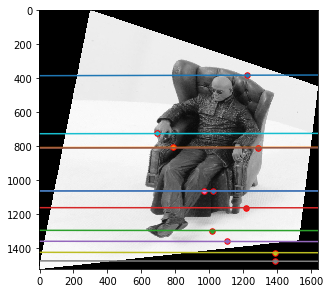

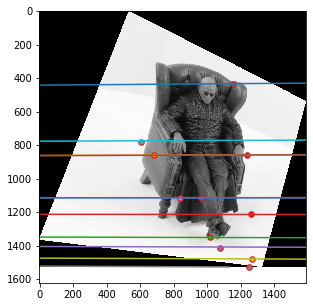

In [504]:
#imgids = ["dino", "matrix", "warrior"]
imgids = ["matrix", "warrior"]
imgs = []
for imgid in imgids:
    I1 = imageio.imread("./p4/"+imgid+"/"+imgid+"0.png")
    I2 = imageio.imread("./p4/"+imgid+"/"+imgid+"1.png")
    imgs.append(rgb2gray(I1))
    imgs.append(rgb2gray(I2))
    cor1 = np.load("./p4/"+imgid+"/cor1.npy")
    cor2 = np.load("./p4/"+imgid+"/cor2.npy")

rectified_im1,rectified_im2,new_cor1,new_cor2 = 
image_rectification(imgs[0],imgs[1],cor1,cor2)
plot_epipolar_lines(rectified_im1,rectified_im2, new_cor1, 
                    new_cor2, colormode = "gray")




In [500]:
def display_correspondence(img1, img2, corrs):
    """Plot matching result on image pair given images and correspondences

    Args:
        img1: Image 1.
        img2: Image 2.
        corrs: Corner correspondence

    """
    
    """
    Your code here.
    You may refer to the show_matching_result function
    """
    h1,w1 = img1.shape
    h2,w2 = img2.shape
    neww = w1+w2
    newh = max(h1,h2)
    new_img1 = np.zeros((newh,w1))
    new_img2 = np.zeros((newh,w2))
    new_img1[:h1,:] = img1
    new_img2[:h2,:] = img2
    plt.imshow(np.hstack((new_img1, new_img2)), cmap='gray') 

    for p1, p2 in corrs:
        plt.scatter(p1[0], p1[1], s=35, edgecolors='r', 
                    facecolors='none')
        plt.scatter(p2[0] + w1, p2[1], s=35, edgecolors='r',
                    facecolors='none')
        plt.plot([p1[0], p2[0] + w1], [p1[1], p2[1]])
    plt.show()

def correspondence_matching_epipole(img1, img2, corners1, F, R, NCCth):
    """Find corner correspondence along epipolar line.

    Args:
        img1: Image 1.
        img2: Image 2.
        corners1: Detected corners in image 1.
        F: Fundamental matrix calculated using given ground truth corner correspondences.
        R: NCC matching window radius.
        NCCth: NCC matching threshold.
    
    
    Returns:
        Matching result to be used in display_correspondence function

    """
    """
    Your code here.
    """
    corners1_euc = to_homog(corners1.T)

    L2_new = np.dot(F_new, corners1_euc)
    n = corners1_euc.shape[1]
    h2,w2 = img2.shape[:2]
    h1,w1 = img1.shape[:2]
    x = range(w)
    matching = []
    for i in range(n):
        line_x = []
        line_y = []
        ncc_max = float('-inf')
        c1 = corners1_euc[:2,i]
        c1 = [int(e) for e in c1]
        if c1[0] < R or c1[0] >= w1-R or c1[1] < R or c1[1] >= h1-R:
            continue

        for idx, xx in enumerate(x):
            yy = (-L2_new[0,i]*xx - L2_new[2,i])/ L2_new[1,i]
            yy = int(yy)
            if yy < R or yy >= h2-R or xx < R or xx >= w2-R :
                continue
            c1 = corners1_euc[:2,i]
            c1 = [int(e) for e in c1]
            c2 = [xx,yy]

            ncc_now = ncc_match(img1, img2, c1, c2, R)
            if ncc_now > ncc_max:
                ncc_max = ncc_now
                pairs = (c1,c2)
        if ncc_max > NCCth:
            matching.append(pairs)
    print("length of matching: {}".format(len(matching)))           
    return matching
    


nCorners:10, NCCTh:0.6, R:10


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:61: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


length of matching: 6


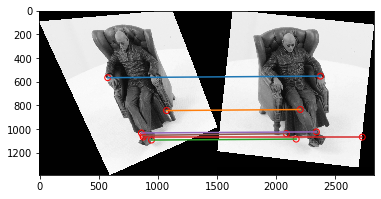

length of matching: 9


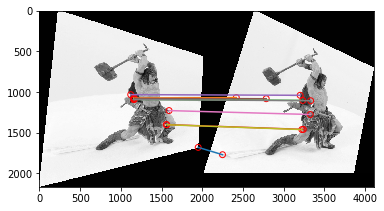

In [505]:
I1 = imageio.imread("./p4/matrix/matrix0.png")
I2 = imageio.imread("./p4/matrix/matrix1.png")
I1_gray = rgb2gray(I1)
I2_gray = rgb2gray(I2)
cor1 = np.load("./p4/matrix/cor1.npy")
cor2 = np.load("./p4/matrix/cor2.npy")
I3 = imageio.imread("./p4/warrior/warrior0.png")
I4 = imageio.imread("./p4/warrior/warrior1.png")
I3_gray = rgb2gray(I3)
I4_gray = rgb2gray(I4)
cor3 = np.load("./p4/warrior/cor1.npy")
cor4 = np.load("./p4/warrior/cor2.npy")

nCorners = 10
# Choose your threshold
NCCth = 0.6
#decide the NCC matching window radius

R = 10
#for R in [5,10,15]:
print("nCorners:{}, NCCTh:{}, R:{}".format(nCorners, NCCth, R))
# For matrix
rectified_im1,rectified_im2,new_cor1,new_cor2 = 
            image_rectification(I1_gray,I2_gray,cor1,cor2)
F_new = fundamental_matrix(new_cor1, new_cor2)


# detect corners using corner detector here, store in corners1
corners1a = corner_detect(rectified_im1, nCorners, smoothSTD, windowSize)
corrs_a = correspondence_matching_epipole(rectified_im1, 
                        rectified_im2, corners1a, F_new, R, NCCth)
display_correspondence(rectified_im1, rectified_im2, corrs_a)

# For warrior
rectified_im3,rectified_im4,new_cor3,new_cor4 = 
                    image_rectification(I3_gray,I4_gray,cor3,cor4)
F_new2=fundamental_matrix(new_cor3, new_cor4)
# You may wish to change your NCCth and R for warrior here.
corners2b = corner_detect(rectified_im3, nCorners, smoothSTD, windowSize)
corrs_b = correspondence_matching_epipole(rectified_im3, 
                            rectified_im4, corners2b, F_new2, R, NCCth)
display_correspondence(rectified_im3, rectified_im4, corrs_b)
